<h1> ANOVA feature selection method</h1>

In [11]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed.xlsx", index_col=0)

In [5]:
df_preprocessed

,review,voted_up
37439,zeskalowanie świat tracić niemal zupełnie sens...,False
1414,totalny dno kolejka hdodanie serwer wcale nie ...,False
12728,dobra typ gracz nudzić samotny biegać kopalnia...,True
11891,fajny poczuć pikselowym świat otoczyć szlam zo...,True
20635,raz zaczynać sezon niepotrzebny stres niepotrz...,False
...,...,...
37771,tył czas zmarnować internet cholerstwo nie chc...,False
73100,skórka cena gem tragedia dobierać gracz meczeć...,False
4761,ciągły wywalać kolejka kolejka kompania gracz ...,False
41470,naprawdę nieudany postać sporo tył odblokować ...,False


In [6]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)
X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_tokens)
X_train.head()

(2554, 116113)


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_test = vectorizer.transform(X_test)
# tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf_tokens)
X_test.head()

(1095, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
all_k = [i for i in range(500, 3000, 500)]
all_selectors = []

for k in all_k:
    print(f"> Fitting SelectKBest selector with score func ANOVA for {k} features")
    selector = SelectKBest(score_func=f_classif, k=k)
    selector = selector.fit(X_train, y_train)
    all_selectors.append(selector)

> Fitting SelectKBest selector with score func ANOVA for 500 features
> Fitting SelectKBest selector with score func ANOVA for 1000 features
> Fitting SelectKBest selector with score func ANOVA for 1500 features
> Fitting SelectKBest selector with score func ANOVA for 2000 features
> Fitting SelectKBest selector with score func ANOVA for 2500 features


<h3> MultinomialNB </h3>

> Training and evaluating MultinomialNB model for 1 selector with 500 features
> Training and evaluating MultinomialNB model for 2 selector with 1000 features
> Training and evaluating MultinomialNB model for 3 selector with 1500 features
> Training and evaluating MultinomialNB model for 4 selector with 2000 features
> Training and evaluating MultinomialNB model for 5 selector with 2500 features
Best k is 2000 with score 0.8356164383561644
              precision    recall  f1-score   support

       False       0.80      0.89      0.84       539
        True       0.88      0.78      0.83       556

    accuracy                           0.84      1095
   macro avg       0.84      0.84      0.84      1095
weighted avg       0.84      0.84      0.84      1095

[[482  57]
 [123 433]]


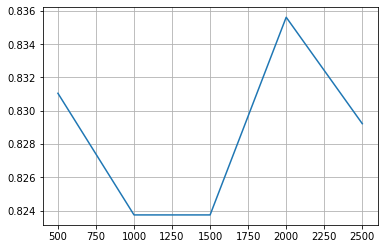

In [10]:
all_scores_MultinomialNB = []
score_best_MultinomialNB = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating MultinomialNB model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    model = GridSearchCV(MultinomialNB(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_MultinomialNB.append(score)

    if score > score_best_MultinomialNB:
        score_best_MultinomialNB = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_MultinomialNB = model
        best_features_MultinomialNB = sel


print(f"Best k is {k_best} with score {score_best_MultinomialNB}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_MultinomialNB)
plt.grid()

<h3> SVC </h3>

> Training and evaluating SVC model for 1 selector with 500 features
> Training and evaluating SVC model for 2 selector with 1000 features
> Training and evaluating SVC model for 3 selector with 1500 features
> Training and evaluating SVC model for 4 selector with 2000 features
> Training and evaluating SVC model for 5 selector with 2500 features
Best k is 1000 with score 0.8447488584474886
              precision    recall  f1-score   support

       False       0.81      0.90      0.85       539
        True       0.89      0.79      0.84       556

    accuracy                           0.84      1095
   macro avg       0.85      0.85      0.84      1095
weighted avg       0.85      0.84      0.84      1095

[[483  56]
 [114 442]]


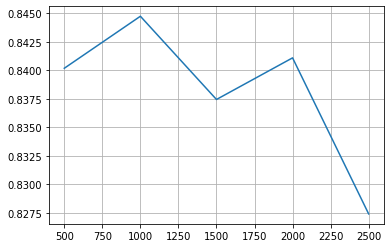

In [11]:
all_scores_SVC = []
score_best_SVC = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating SVC model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001]}

    model = GridSearchCV(SVC(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_SVC.append(score)

    if score > score_best_SVC:
        score_best_SVC = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_SVC = model
        best_features_SVC = sel


print(f"Best k is {k_best} with score {score_best_SVC}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_SVC)
plt.grid()

<h3> LogisticRegression </h3>

> Training and evaluating LogisticRegression model for 1 selector with 500 features
> Training and evaluating LogisticRegression model for 2 selector with 1000 features
> Training and evaluating LogisticRegression model for 3 selector with 1500 features
> Training and evaluating LogisticRegression model for 4 selector with 2000 features
> Training and evaluating LogisticRegression model for 5 selector with 2500 features
Best k is 1000 with score 0.8547945205479452
              precision    recall  f1-score   support

       False       0.85      0.85      0.85       539
        True       0.86      0.86      0.86       556

    accuracy                           0.85      1095
   macro avg       0.85      0.85      0.85      1095
weighted avg       0.85      0.85      0.85      1095

[[460  79]
 [ 80 476]]


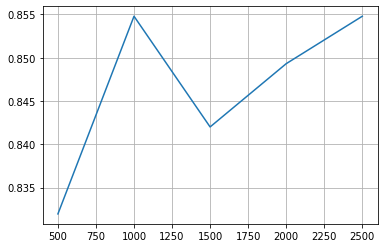

In [12]:
all_scores_LogisticRegression = []
score_best_LogisticRegression = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating LogisticRegression model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet']}

    model = GridSearchCV(LogisticRegression(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_LogisticRegression.append(score)

    if score > score_best_LogisticRegression:
        score_best_LogisticRegression = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_LogisticRegression = model
        best_features_LogisticRegression = sel


print(f"Best k is {k_best} with score {score_best_LogisticRegression}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_LogisticRegression)
plt.grid()

<h3>RandomForestClassifier</h3>

> Training and evaluating RandomForestClassifier model for 1 selector with 500 features
> Training and evaluating RandomForestClassifier model for 2 selector with 1000 features
> Training and evaluating RandomForestClassifier model for 3 selector with 1500 features
> Training and evaluating RandomForestClassifier model for 4 selector with 2000 features
> Training and evaluating RandomForestClassifier model for 5 selector with 2500 features
Best k is 2000 with score 0.8200913242009132
              precision    recall  f1-score   support

       False       0.83      0.80      0.81       539
        True       0.81      0.84      0.83       556

    accuracy                           0.82      1095
   macro avg       0.82      0.82      0.82      1095
weighted avg       0.82      0.82      0.82      1095

[[432 107]
 [ 90 466]]


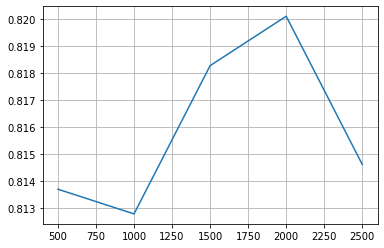

In [13]:
all_scores_RandomForestClassifier = []
score_best_RandomForestClassifier = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating RandomForestClassifier model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'n_estimators': [100, 200, 400, 600]}

    model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_RandomForestClassifier.append(score)

    if score > score_best_RandomForestClassifier:
        score_best_RandomForestClassifier = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_RandomForestClassifier = model
        best_features_RandomForestClassifier = sel


print(f"Best k is {k_best} with score {score_best_RandomForestClassifier}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_RandomForestClassifier)
plt.grid()

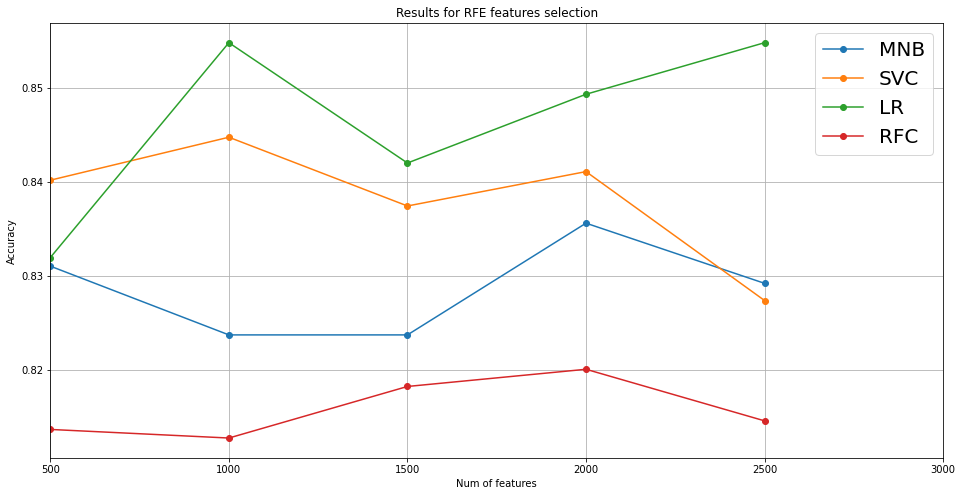

In [14]:
plt.figure(figsize=(16, 8))

plt.plot(all_k, all_scores_MultinomialNB, '-o')
plt.plot(all_k, all_scores_SVC, '-o')
plt.plot(all_k, all_scores_LogisticRegression, '-o')
plt.plot(all_k, all_scores_RandomForestClassifier, '-o')

plt.xlim(500, 3000)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20})
plt.xlabel("Num of features")
plt.ylabel("Accuracy")
plt.title("Results for RFE features selection")

# point1 = [0, 0.83]
# point2 = [2500, 0.83]
# x_values = [point1[0], point2[0]]
# y_values = [point1[1], point2[1]]

# plt.plot(x_values, y_values, 'k--')

plt.grid()